In [31]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_suma_CLASS.csv")
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_CLASS.csv")
dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_no_mean_SentenceBERT_Wordnet5w2H_CLASS.csv",low_memory=False)
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,Why,How,Additional information,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w
0,23.182777,0.000000,8.168021,0.00000,3.787637,0.000000,0.000000,0.00000,1.747140,0.00000,...,1.0,1.0,1.000000,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000
1,22.942028,1.591551,2.134990,0.00000,0.000000,8.615627,0.000000,0.00000,6.468956,0.00000,...,1.0,1.0,0.699488,3.637586,0.000000,0.0,3.637586,0.0,0.0,3.637586
2,14.880619,1.824592,3.687874,0.00000,5.383794,0.000000,3.665578,0.00000,1.199861,0.00000,...,1.0,1.0,1.000000,3.637586,2.251292,0.0,2.538974,0.0,0.0,0.000000
3,6.220228,0.000000,1.236711,0.00000,2.620311,0.000000,0.000000,0.00000,3.244059,0.00000,...,1.0,1.0,1.000000,2.028148,0.000000,0.0,3.637586,0.0,0.0,0.000000
4,12.571067,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450579,0.00000,...,1.0,1.0,1.000000,3.637586,3.637586,0.0,2.251292,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.506134,3.235250,0.000000,0.00000,0.000000,5.424360,0.000000,0.00000,1.057925,1.00428,...,1.0,1.0,1.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000
96,11.299096,0.000000,0.000000,0.00000,5.716955,0.000000,0.000000,0.00000,0.000000,0.00000,...,1.0,1.0,1.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000
97,5.297839,0.000000,5.138863,0.00000,0.000000,0.000000,0.000000,0.00000,1.224579,0.00000,...,1.0,1.0,1.000000,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000
98,7.110450,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450452,0.00000,...,1.0,1.0,1.000000,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000


In [33]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,Why,How,Additional information,Who_w,Where_w,When_w,What_w,Why_w,How_w,Additional information_w
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,15.933630,1.420933,2.266566,0.487803,3.229856,1.398877,0.406870,0.277978,2.540163,0.193960,...,0.908617,0.860216,0.870180,3.216180,0.952474,0.083880,2.465364,0.155714,0.248701,0.405521
std,11.844145,2.745811,3.052742,1.744622,4.718448,3.249229,1.306758,1.370748,3.315508,0.646068,...,0.259196,0.309860,0.293922,0.979224,1.417860,0.492678,1.268416,0.691334,0.747393,1.052825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.009505,0.026425,-0.013459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.934640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,3.637586,0.000000,0.000000,1.871802,0.000000,0.000000,0.000000
50%,12.463868,0.000000,1.342973,0.000000,1.779214,0.000000,0.000000,0.000000,1.592038,0.000000,...,1.000000,1.000000,1.000000,3.637586,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000
75%,19.832999,2.225710,3.601139,0.000000,3.795642,0.000000,0.000000,0.000000,3.260690,0.000000,...,1.000000,1.000000,1.000000,3.637586,1.730214,0.000000,3.637586,0.000000,0.000000,0.000000
max,69.723298,15.646733,19.075915,11.812714,25.429739,17.176733,8.096021,10.670149,17.773756,5.053692,...,1.000000,1.000000,1.000000,3.637586,3.637586,3.258097,3.637586,3.637586,3.637586,3.637586


In [34]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


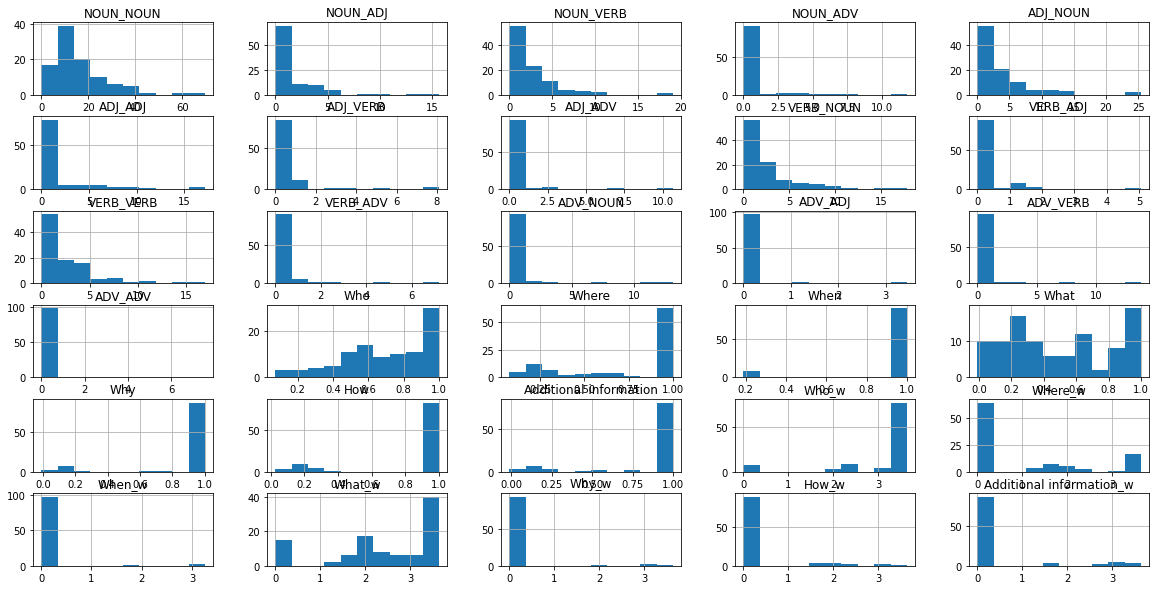

In [35]:
dataframe.hist(figsize=(20,10))
plt.show()

In [36]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [37]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [38]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_113234/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_113234/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 30)

In [39]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [40]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [41]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [42]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
model.decision_function(X)

array([[ 4.13288869e-01,  7.71838475e-01, -1.18512734e+00],
       [-1.18797725e+00,  1.54261237e+00, -3.54635127e-01],
       [-5.21736949e-01,  3.82247947e-01,  1.39489002e-01],
       [ 3.89163355e-01,  8.73087400e-02, -4.76472095e-01],
       [-5.46346453e-01,  2.75715403e-01,  2.70631049e-01],
       [-1.18927084e-01,  5.34799300e-01, -4.15872216e-01],
       [-1.11753269e+00, -5.89140388e-01,  1.70667308e+00],
       [-1.13089055e+00,  7.54410728e-01,  3.76479818e-01],
       [-7.06627932e-01, -1.28604266e+00,  1.99267059e+00],
       [ 5.87569557e-01,  5.60248313e-01, -1.14781787e+00],
       [-6.79196301e-01, -7.65671721e-02,  7.55763473e-01],
       [ 1.64205034e-01,  2.28559689e-01, -3.92764722e-01],
       [-2.32876055e-01,  3.55933346e-01, -1.23057292e-01],
       [ 4.87911838e-01,  1.13031605e-01, -6.00943443e-01],
       [-5.17430548e-01, -3.67005591e-01,  8.84436139e-01],
       [-5.62427746e-01,  2.89637932e-01,  2.72789814e-01],
       [-8.60320281e-01,  1.80648863e+00

In [44]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV',
 'Who','Where','When','What','Why','How','Additional information',
 'Who_w','Where_w','When_w','What_w','Why_w','How_w','Additional information_w']

In [45]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [46]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [47]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  3 NOUN_ADV 16 Who
Entailment  19 What 27 Why_w
Neutral  27 Why_w 19 What


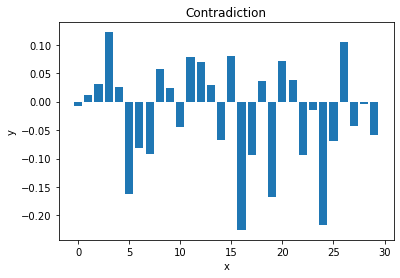

In [48]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,30,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

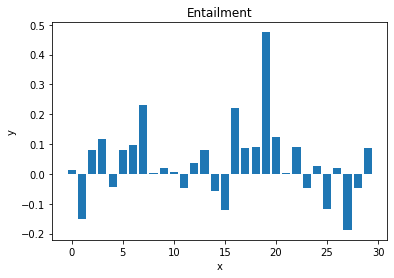

In [49]:
x_v = np.arange(0,30,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

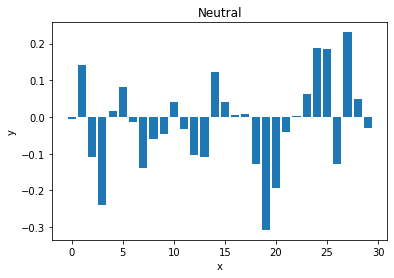

In [50]:
x_v = np.arange(0,30,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [51]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'entailment' 'neutral' 'entailment' 'neutral' 'contradiction' 'neutral'
 'entailment' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'contradiction' 'entailment' 'neutral' 'contradiction' 'entailment'
 'contradiction' 'contradiction' 'entailment' 'contradiction' 'neutral'
 'entailment' 'contradiction' 'neutral' 'neutral' 'neutral' 'neutral'
 'contradiction' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'entailment' 'neutral' 'contradiction' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'contradiction' 'contradiction' 'entailment' 'contradiction' 'entailment'
 'neutral' 'neutral' 'neutral' 'entailment'

In [52]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [53]:
X

array([[23.18277657,  0.        ,  8.16802084, ...,  0.        ,
         0.        ,  0.        ],
       [22.94202816,  1.59155118,  2.13499045, ...,  0.        ,
         0.        ,  3.63758616],
       [14.88061917,  1.82459164,  3.68787432, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.29783893,  0.        ,  5.13886273, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.11044979,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [12.45881259,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
model.score(X,y)

0.62

In [55]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [56]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.444444 (0.192450)


/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [57]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [58]:
print(confusion_matrix(Y_validation, predictions))

[[1 2 0]
 [0 2 0]
 [0 2 3]]


In [59]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       1.00      0.33      0.50         3
   entailment       0.33      1.00      0.50         2
      neutral       1.00      0.60      0.75         5

     accuracy                           0.60        10
    macro avg       0.78      0.64      0.58        10
 weighted avg       0.87      0.60      0.62        10



In [60]:
#X_new = pd.DataFrame()
#model.predict(X_new)